In [1]:
from main import *
from PIL import Image
day_title = Image.open(r"C:\Users\USER\Crime_Data_Analysis\pics\crime_by_day.png")
day_title = day_title.crop((200,130,1920,424))
title = Image.open(r"C:\Users\USER\Crime_Data_Analysis\pics\basic_analysis.png")
title = title.crop((200,200,1800,650))
top_ten = Image.open(r"C:\Users\USER\Crime_Data_Analysis\pics\top_ten.png")
top_ten = top_ten.crop((180,130,1820,430))
three_common = Image.open(r"C:\Users\USER\Crime_Data_Analysis\pics\three_common.png")
three_common = three_common.crop((0,300,1920,460))
crimes_by_hour = Image.open(r"C:\Users\USER\Crime_Data_Analysis\pics\crimes_by_houre.png")
crimes_by_hour = crimes_by_hour.crop((100,330,1920,450))

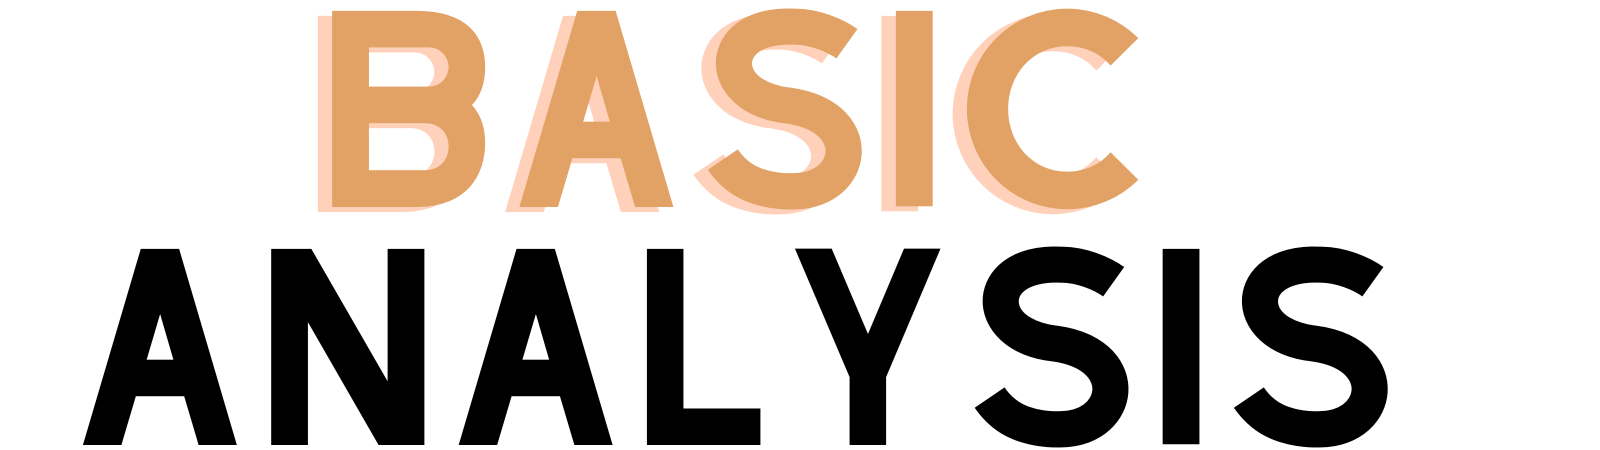

In [2]:
title

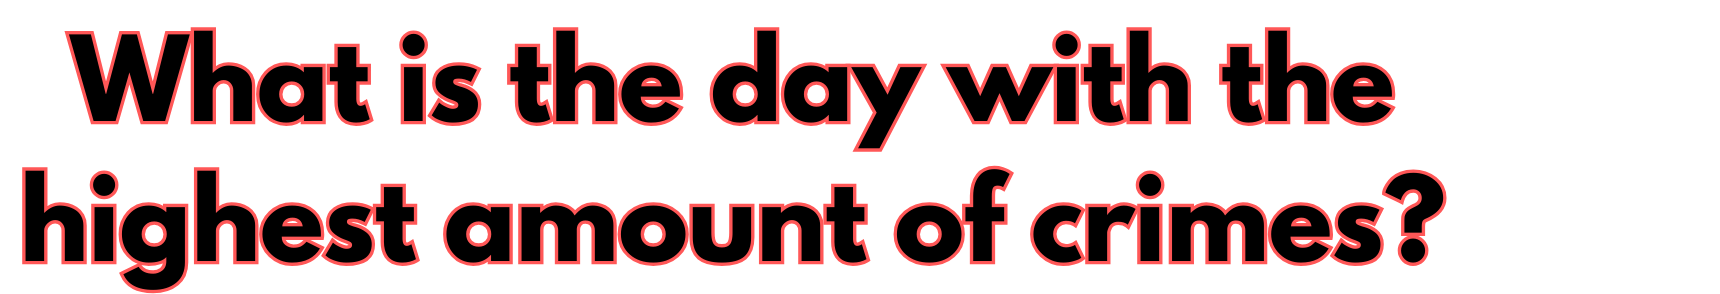

In [3]:
day_title

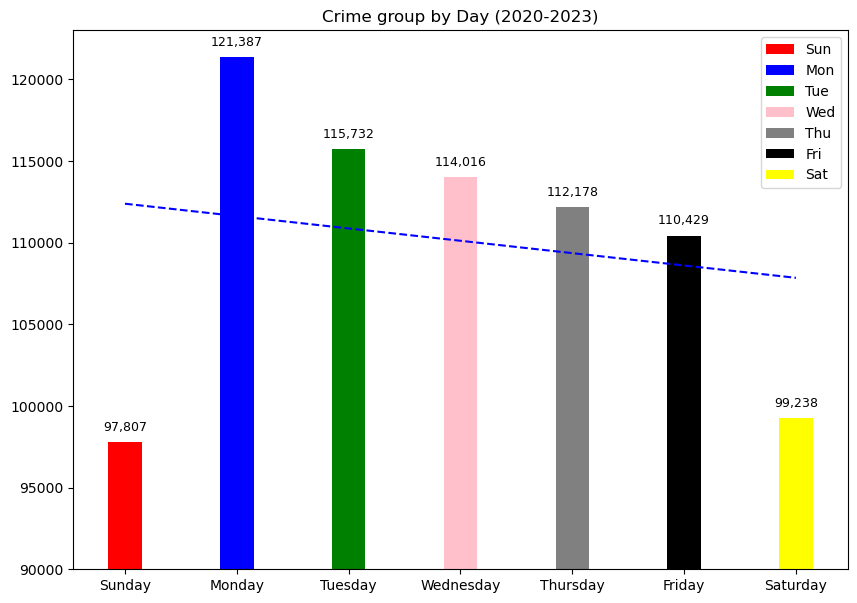

In [4]:
# The day with the highest percentage of crimes

fact_dayname = Fact[['File_Number','Report_Date','Occ_Time']].merge(Dim_Date[['Report_Date','Day_Name','Week_Day']],how = 'left', on = 'Report_Date')
crime_for_day = fact_dayname.groupby(['Day_Name','Week_Day'])['File_Number'].count().reset_index()
crime_for_day = crime_for_day.sort_values(by = 'Week_Day')
X = crime_for_day['Day_Name']
Y = crime_for_day['File_Number']


figure = plt.figure(figsize = (10,7))
plt.ylim(90000,123000)
bars = plt.bar(X,Y,color = ['r','b','g','pink','gray','black','yellow'],label = [day[:3] for day in crime_for_day['Day_Name'].tolist()],width=0.3)
plt.legend()
plt.title("Crime group by Day (2020-2023)")
z = np.polyfit(list(range(1,8)), Y, 1)
p = np.poly1d(z)
plt.plot(X, p(list(range(1,8))), "b--")
for bar, value in zip(bars, Y):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{int(value):,}', ha='center', va='bottom', color='black', fontsize=9)



plt.show()
#the day with the highes amount of crimes is Monday: with 121,387 crimes reported in the data set. ⬇️

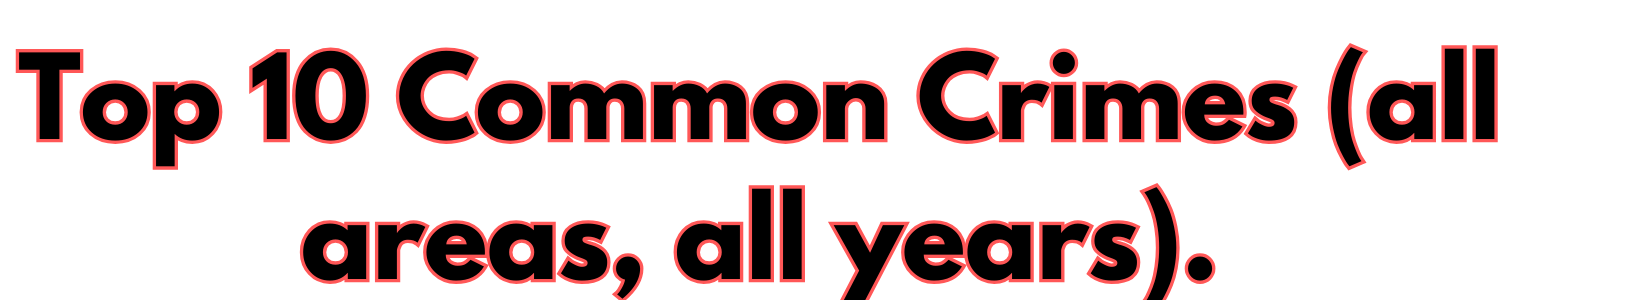

In [5]:
top_ten


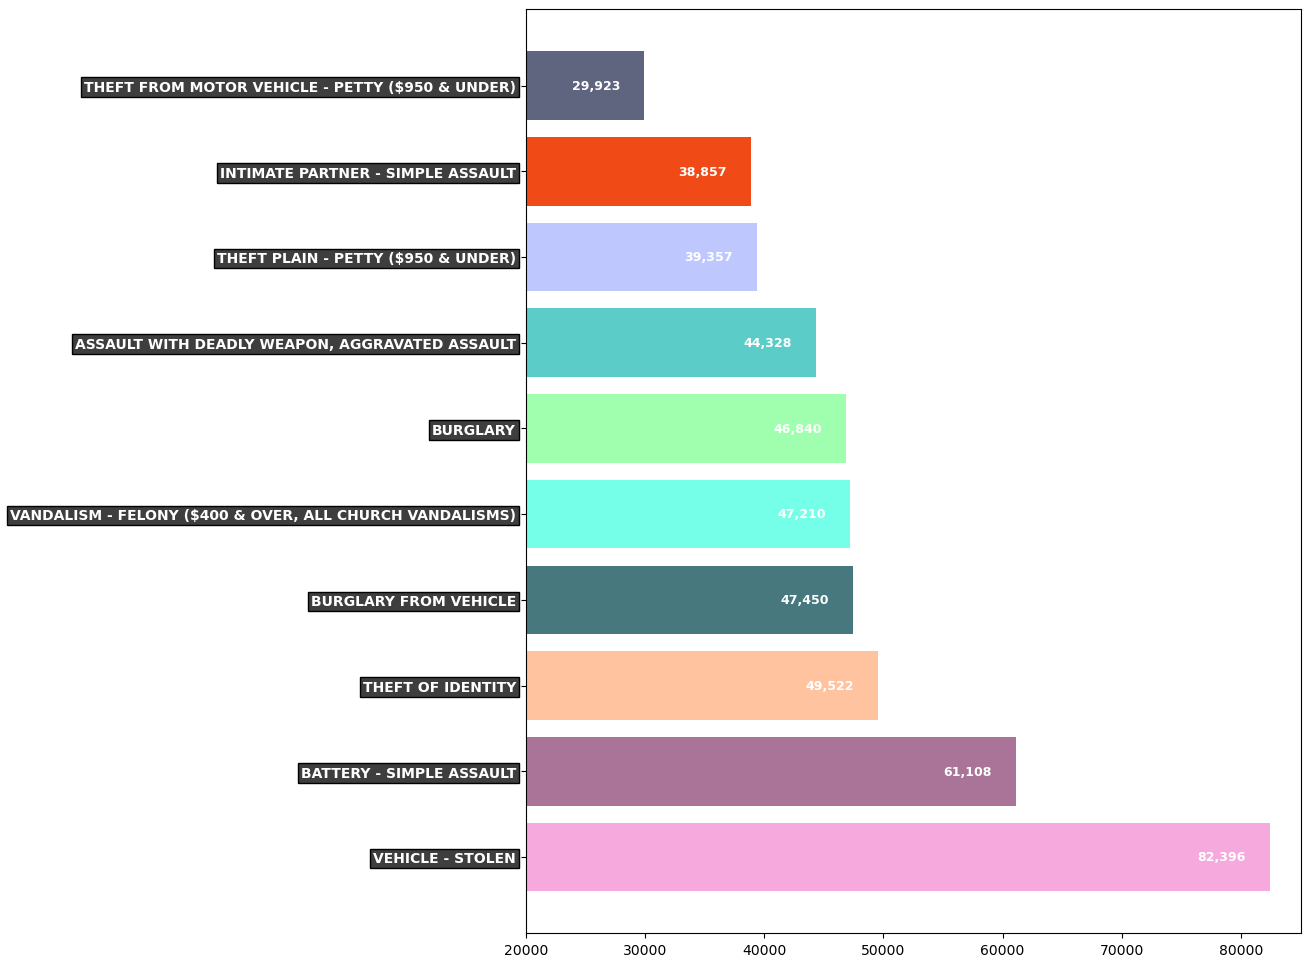

In [6]:
#Top 10 Common Crimes
top_10_crimes =Fact['Crime_Code'].value_counts().reset_index().rename(columns = {"Crime_Code":"crime_count","index":"Crime_Code"})
top_10_crimes = top_10_crimes.merge(Dim_Crime,on = 'Crime_Code').head(10)
top_10_crimes = top_10_crimes[['Crime_Desc','crime_count']]
crime_description = top_10_crimes['Crime_Desc'].tolist()
crime_count = top_10_crimes['crime_count'].tolist()
fig = plt.figure(figsize=(10, 12))  
plt.xlim(20000, 85000) 
barim = plt.barh(crime_description, crime_count, color=['#f6a9dc', '#a97497', '#ffc39f', '#46787d', '#75ffe8', '#9fffaf', '#5cccc8', '#bec8ff', '#f04a17', '#5f647f'])
for bar, value in zip(barim, crime_count):
    width = bar.get_width()
    plt.text(width - 2000, bar.get_y() + bar.get_height() / 2, f'{int(value):,}', ha='right', va='center', color='white', fontsize=9, weight='bold')
ax = plt.gca()
for label in ax.get_yticklabels(): 
    label.set_bbox({'facecolor':'#3e3e3e', "edgecolor":'black', 'pad':2})
    label.set_color('white')
    label.set_weight('bold')
plt.show()

#Here are the results ⬇️

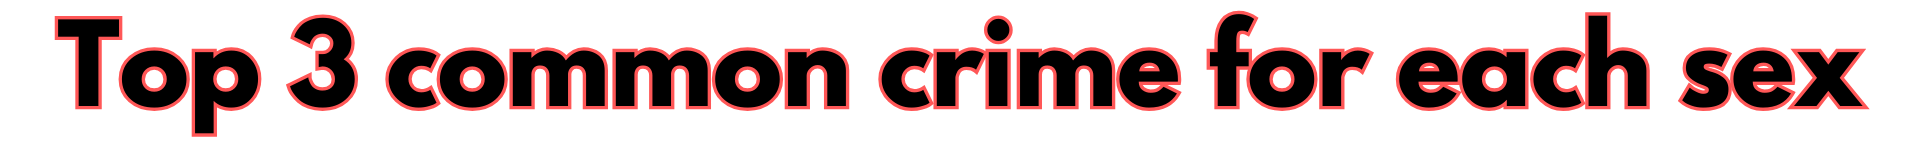

In [7]:
three_common

In [8]:
# Top 3 common crime for each sex:

report_victim = Fact[['File_Number','Crime_Code']].merge(Dim_Crime,how = 'left',on = 'Crime_Code').merge(Dim_Victim, on = 'File_Number')
crime_groupby_sex = report_victim.groupby(['Vict_Sex','Crime_Desc'])['File_Number'].count().reset_index().sort_values(by = ['Vict_Sex','File_Number'])
crime_groupby_sex['rank'] = crime_groupby_sex.groupby(['Vict_Sex'])['File_Number'].rank(method = 'dense',ascending = False)
crime_groupby_sex = crime_groupby_sex[crime_groupby_sex['rank'].isin([1,2,3])]
crime_groupby_sex.drop(['rank'],axis = 1,inplace = True)
crime_groupby_sex.reset_index(drop = True,inplace = True)
crime_groupby_sex = crime_groupby_sex.sort_values(by = ['Vict_Sex','File_Number'],ascending = False)
crime_groupby_sex['Rank'] = crime_groupby_sex.groupby(['Vict_Sex'])['File_Number'].rank(method = 'dense',ascending = False).astype(int)
crime_groupby_sex.reset_index(drop = True)
crime_groupby_sex = crime_groupby_sex[['Vict_Sex','Crime_Desc']]
crime_groupby_sex

Vict_Sex                                       Crime_Desc
8        X                                 VEHICLE - STOLEN
7        X  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
6        X                                         BURGLARY
5        M                         BATTERY - SIMPLE ASSAULT
4        M   ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
3        M                            BURGLARY FROM VEHICLE
2        F                INTIMATE PARTNER - SIMPLE ASSAULT
1        F                                THEFT OF IDENTITY
0        F                         BATTERY - SIMPLE ASSAULT

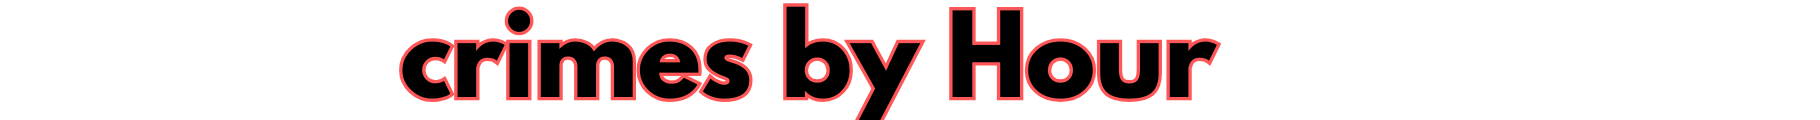

In [9]:
crimes_by_hour

In [10]:
#Creating an Hour column for groupby
#*take a littel while to run*
def time_round(time_delta):
    rounded_time = time_delta.round('H')
    return rounded_time

# Extract the time part


# Convert the time to timedelta
Fact['Occ_Time'] = Fact['Occ_Time'].apply(lambda x: pd.to_timedelta(str(x)))

# Round the timedelta to the nearest hour
Fact['Occ_Hour'] = Fact['Occ_Time'].apply(time_round)
Fact['Occ_Hour'] = Fact['Occ_Hour'].astype(str)
Fact['Occ_Hour'] = Fact['Occ_Hour'].str[7:]
Fact['Occ_Hour'] = Fact['Occ_Hour'].str[:5]

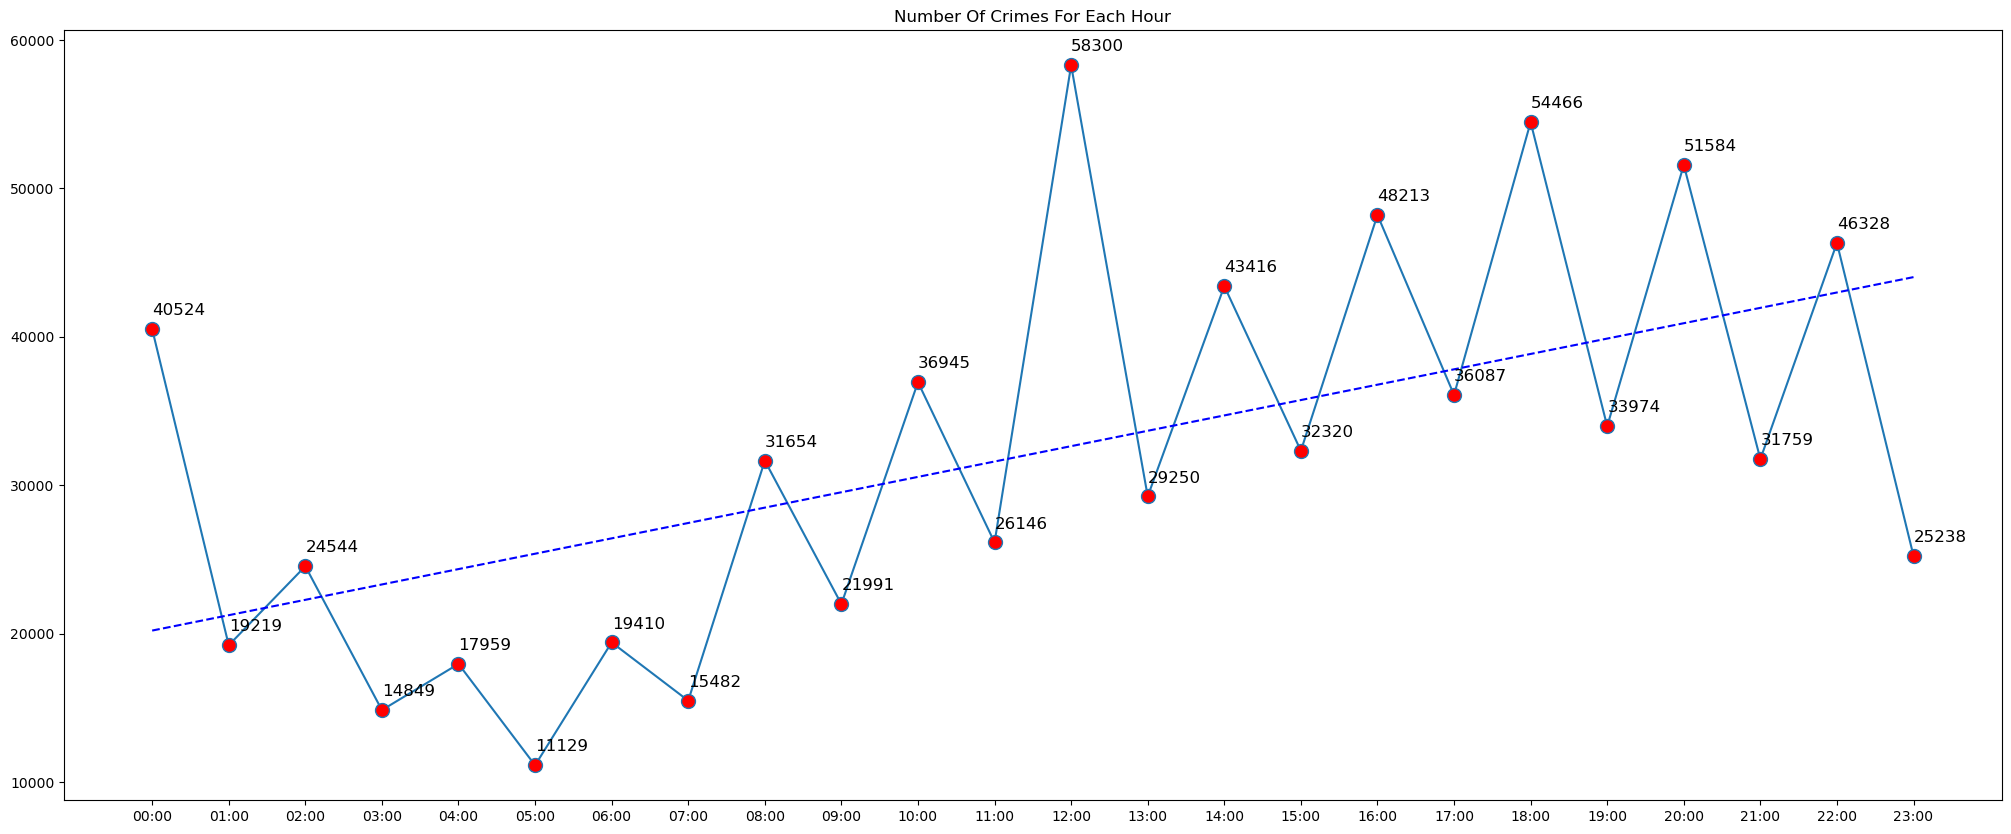

In [11]:
top_crimes_by_hour = Fact.groupby(['Occ_Hour'])['File_Number'].count().reset_index()
fig,axe = plt.subplots(figsize = (25,10))
hour = top_crimes_by_hour['Occ_Hour'].str[:2].astype(int)
count = top_crimes_by_hour['File_Number']
axe.plot(hour,count,marker = 'o',markerfacecolor = 'r',markersize = 10)
axe.set_title('Number Of Crimes For Each Hour')

z = np.polyfit(hour, count, 1)
p = np.poly1d(z)
axe.plot(hour,p(hour), "b--")

axe.set_xticks(hour)
axe.set_xticklabels(top_crimes_by_hour['Occ_Hour'])


for x, y in zip(hour, count):
    plt.annotate(y,  # text to display
                 (x, y),  # point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='left',  # horizontal alignment
                 fontsize=12)

plt.show()

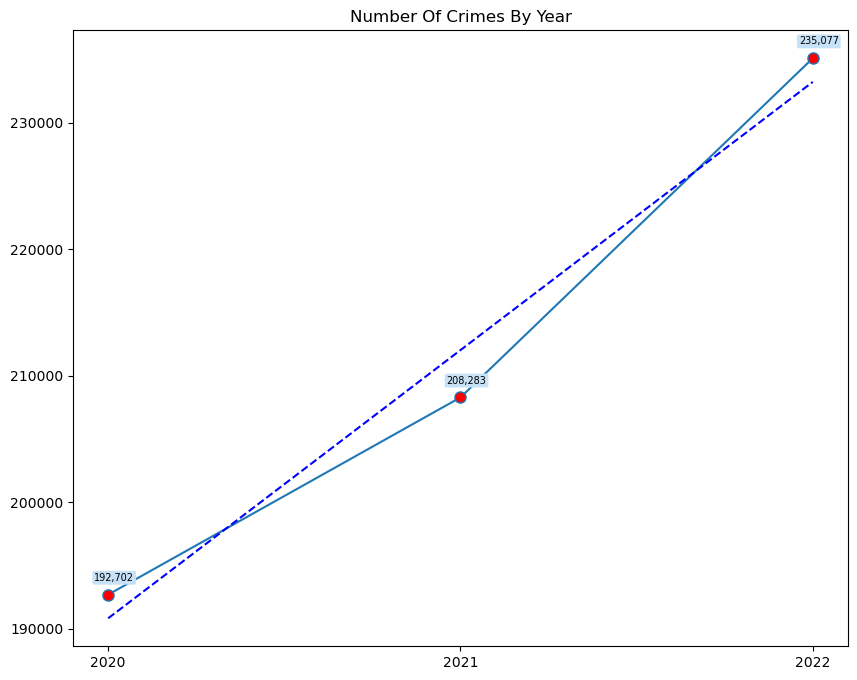

In [12]:
#crimes by year 
number_of_crimes_by_year = (data[['File_Number','Report_Date']].merge(Dim_Date,how = 'left',on = 'Report_Date'))['year'].value_counts().reset_index().sort_values(by=['index'],ascending = [True]).rename(columns = {"index":"year","year":"number_of_crimes"}).reset_index(drop=True)
number_of_crimes_by_year = number_of_crimes_by_year[number_of_crimes_by_year['year']!=2023]
year = number_of_crimes_by_year['year']
number_of_crimes = number_of_crimes_by_year['number_of_crimes']

fig,axe = plt.subplots(figsize = (10,8))
axe.plot(year, number_of_crimes,marker = 'o', markerfacecolor = 'red',markersize = 8)
axe.set_xticks(year)
axe.set_title("Number Of Crimes By Year")

z = np.polyfit(year, number_of_crimes, 1)
p = np.poly1d(z)
axe.plot(year, p(year), "b--")


for x,y in zip(year,number_of_crimes):
    plt.annotate('{:,.0f}'.format(y),(x,y),textcoords = 'offset points',xytext = (-10,10),ha='left',fontsize = 7, bbox = {'facecolor':'#c7e1f6','edgecolor':'none', 'boxstyle':"round,pad=0.2"})

plt.show()

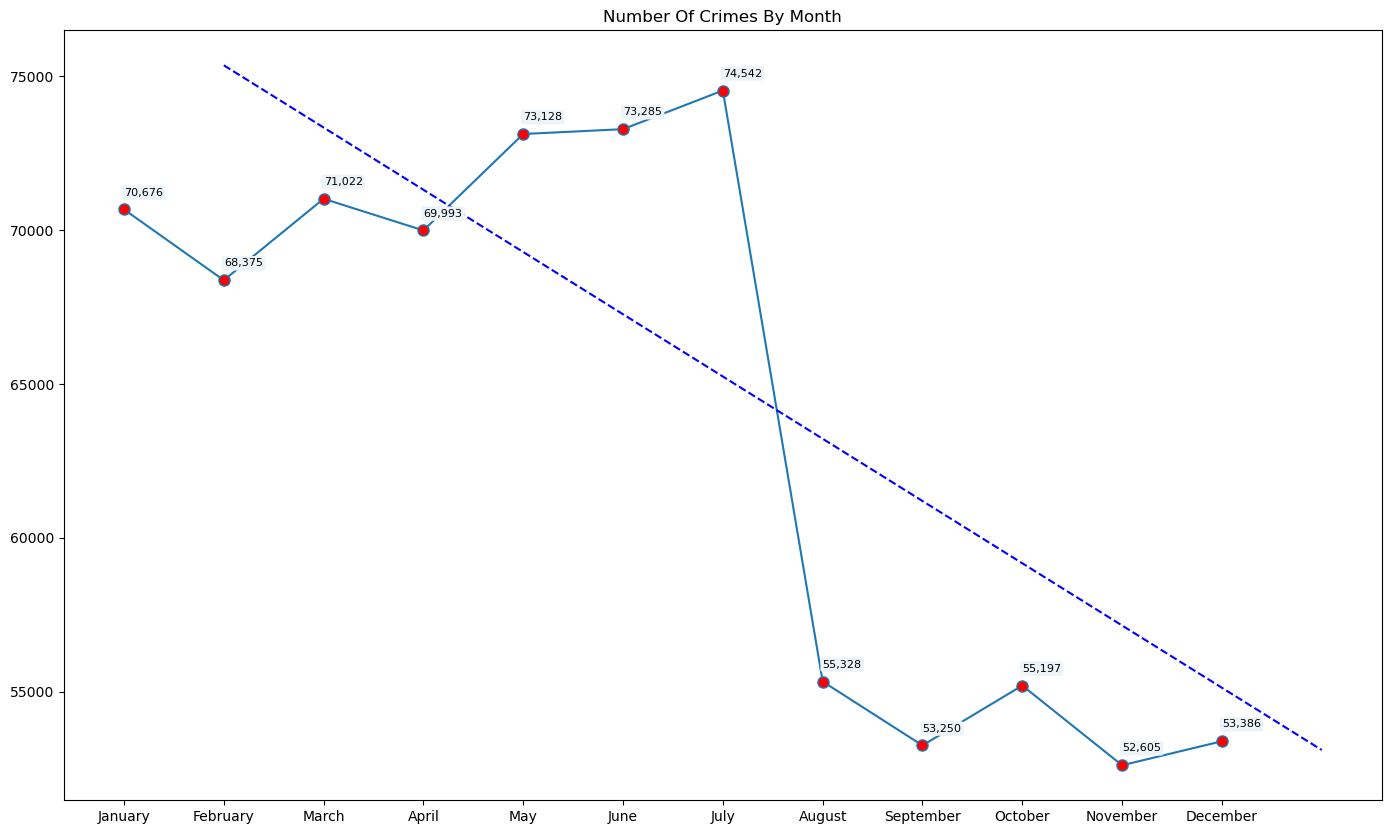

In [13]:
#number of crimes by month 
import calendar

number_of_crimes_by_month = (data[['File_Number','Report_Date']].merge(Dim_Date,how = 'left',on = 'Report_Date'))['month'].value_counts().reset_index().sort_values(by=['index'],ascending = [True]).rename(columns = {"index":"month","month":"number_of_crimes"}).reset_index(drop=True)
month=list(calendar.month_name[1:])
count=number_of_crimes_by_month['number_of_crimes']

fig,axe = plt.subplots(figsize=(17,10))
axe.plot(month,count,marker = 'o',markerfacecolor = 'red',markersize = 8)
axe.set_title('Number Of Crimes By Month')
axe.set_xticks(month)

z = np.polyfit(list(range(1,13)),count,1)
p = np.poly1d(z)
axe.plot(list(range(1,13)),p(list(range(1,13))),'b--')

for x,y in zip(month, count):
    plt.annotate('{:,.0f}'.format(y),(x,y),textcoords = 'offset points',xytext=(0,10),ha='left',fontsize=8,bbox = {"facecolor":'#edf4f9','edgecolor':'none','boxstyle':'round,pad=0.2'})
plt.show()


